In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

In [11]:
df = pd.read_csv("./data/p2.csv", parse_dates=['Date'])

df = df[['Date', 'Close', 'Volume']]
df.columns = ['ds' ,'y', 'Volume']
size = int(len(df) * 0.8)
train = df[:size]
test = df[size:]


09:17:12 - cmdstanpy - INFO - Chain [1] start processing
09:17:12 - cmdstanpy - INFO - Chain [1] done processing


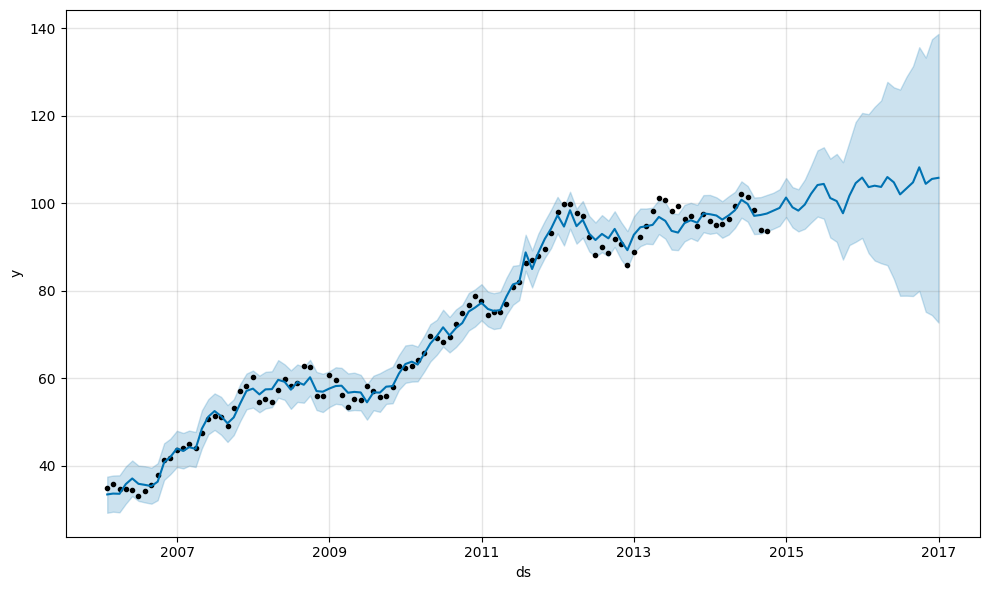

In [12]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    interval_width=0.95
)

model.add_regressor('Volume', prior_scale=1.0)
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='ME')

future['Volume'] = pd.concat(
    [train['Volume'], test['Volume']],
    ignore_index=True
)

forecast = model.predict(future)
model.plot(forecast)
plt.show()